# Information about Dataset
The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds. The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds.

We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time. So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

The response variable is y in column 179, the Explanatory variables X1, X2, ..., X178

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure. Our motivation for creating this version of the data was to simplify access to the data via the creation of a .csv version of it. Although there are 5 classes most authors have done binary classification, namely class 1 (Epileptic seizure) against the rest.

For more information about the dataset, please click [here](https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition#)


# Goal of the Tutorial: Detecting Epileptic seizure using Binary Classification of Time Series Data

The aim of this Binary classification is to classify an EEG signal to either epileptic or not i.e whether an EEG signal belongs to class 1 or not

# Data Exploration

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [ ]:
# Basic processing of dataframe
df = pd.read_csv("data.csv")
columns = list(df.columns)
columns.pop()
columns[0] = 'ID'
columns.append( 'Class' )
df.columns = columns
df = df.set_index("ID")

Class = df.Class
df = df.drop(['Class'], axis = 1)

# df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8


In [ ]:
# Obtaining information of basic descriptors
description = {}
for index, row in df.iterrows():
    description[index] = [np.mean(row), np.std(row), min(row), np.quantile(row,0.25),
                          np.median(row), np.quantile(row,0.75), max(row)]
descriptors = ['Mean','Standard Deviation','Min','Q1','Median','Q3','Max']

description_df = pd.DataFrame(description).transpose()
description_df.columns = descriptors
description_df = pd.concat([description_df,Class], axis=1)
# description_df

,Mean,Standard Deviation,Min,Q1,Median,Q3,Max,Class
ID,,,,,,,,
X21.V1.791,-16.910112,95.710958,-281.0,-78.50,-11.5,49.75,229.0,4
X15.V1.924,28.112360,471.835823,-1716.0,-90.50,220.5,325.50,513.0,1
X8.V1.1,-44.044944,44.186380,-126.0,-77.75,-44.5,-15.00,80.0,5
X16.V1.60,-68.910112,15.923723,-105.0,-80.00,-69.0,-60.00,-22.0,5
X20.V1.54,-6.651685,38.693001,-103.0,-32.00,-1.0,22.75,78.0,5
...,...,...,...,...,...,...,...,...
X22.V1.114,5.157303,38.268536,-79.0,-23.00,7.5,38.00,73.0,2
X19.V1.354,5.674157,163.078548,-388.0,-92.50,27.5,103.75,471.0,1
X8.V1.28,6.752809,44.164855,-90.0,-22.00,8.5,35.00,121.0,5


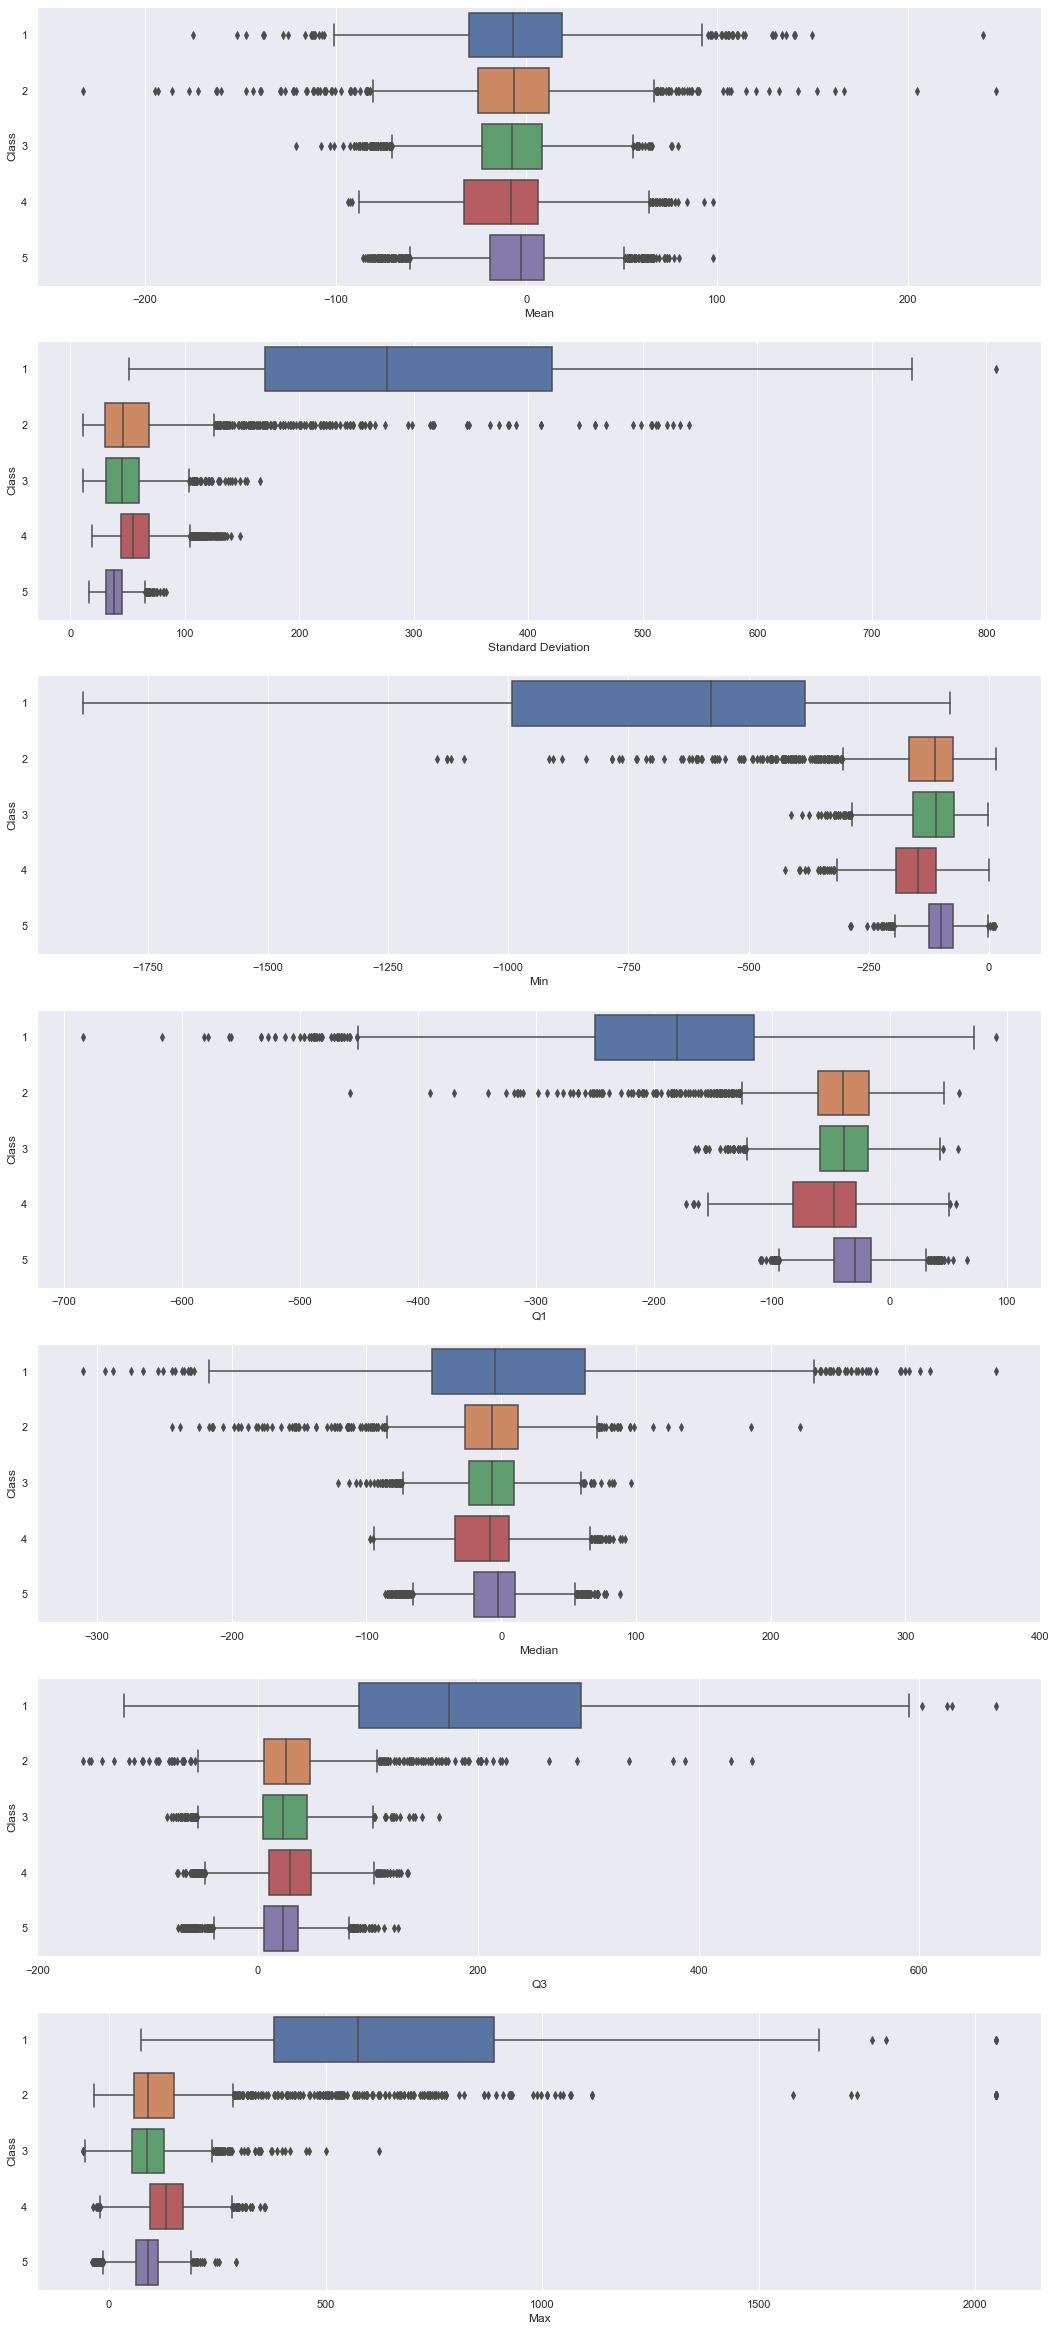

In [ ]:
#Plotting basic descriptors against the classes
f, axes = plt.subplots(7, 1, figsize=(18, 42))

count = 0
for var in descriptors:
    sb.boxplot(x = var, y = "Class", data = description_df, orient = "h", ax = axes[count])
    count += 1

From the boxplots above, we can see that Class 1 is significantly different from the rest of the classes. It has a much higher change in amplitude over the sampling period as compared to the other classes. This is also evident in the time series plot of the data. The rest of the data are rather indistinguishable from each other (At least from the basic descriptors) as most of boxplots look similar to each other. These data might be sufficient for a binary classification of Class 1 against the rest due to the significant differences

Note: I did not use swarmplot due to the great amount of datapoints which result in long computation time.

In [ ]:
df = pd.read_csv (r'data.csv')
patient_ID = [df['Unnamed: 0'][i] for i in range(len(df))]
time_data = [None for i in range(len(df))]
for i in range(len(patient_ID)):
    position_V = patient_ID[i].index('V')
    time_data[i] = int(patient_ID[i][1:position_V-1])
    patient_ID[i] = patient_ID[i][position_V+1:]
    patient_ID[i] = patient_ID[i].replace('.','0')
    patient_ID[i] = int(patient_ID[i])

df.insert(1, 'ID', patient_ID)
df.insert(0, 'Time', time_data)
df = df.drop(['Unnamed: 0'], axis=1)
df = df.sort_values(["y","ID","Time"])
df = df.set_index(['ID'])

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


Creating a list of 5 dataframes each corresponding to the unique value of y.
For example,

                                        ep[0] is dataframe with y as 1
                                        ep[1] is dataframe with y as 2
                                        ep[2] is dataframe with y as 3
                                        ep[3] is dataframe with y as 4
                                        ep[4] is dataframe with y as 5

In [ ]:
ep=[]
for i in range(1,6):
    ep_1=df[df.y.isin([i])]
    ep.append(ep_1)

In [ ]:
ep[1]

,Time,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
ID,,,,,,,,,,,,,,,,,,,,,
13,1,34,33,28,22,21,22,22,19,22,...,20,20,22,17,19,19,23,18,19,2
13,2,12,2,-4,-13,0,-6,5,4,4,...,93,91,87,76,67,64,57,49,47,2
13,3,48,49,53,59,67,73,78,72,63,...,15,10,-1,-8,-8,-5,7,11,13,2
13,4,12,9,21,26,22,24,16,19,18,...,59,59,59,64,74,77,72,60,42,2
13,5,35,41,56,70,82,91,101,104,112,...,28,20,20,15,13,10,13,1,-11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993,19,-73,-75,-80,-85,-87,-85,-82,-82,-80,...,35,25,21,20,8,0,-11,-12,-16,2
10993,20,-13,-20,-18,-15,-13,-14,-16,-27,-35,...,-76,-75,-73,-66,-71,-72,-75,-79,-77,2
10993,21,-68,-56,-43,-29,-27,-27,-23,-20,-29,...,-34,-39,-40,-44,-47,-42,-36,-23,-24,2


Plots for 5 datasets of the same patient

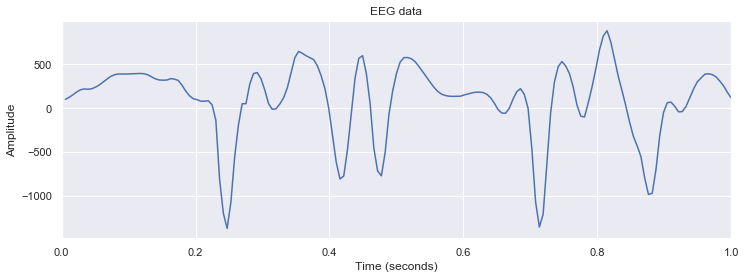

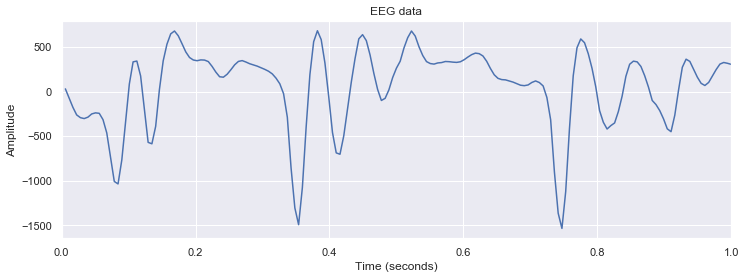

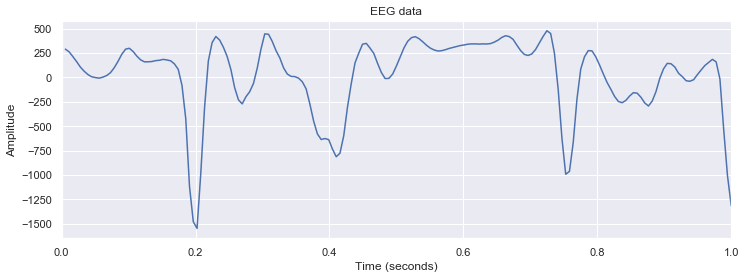

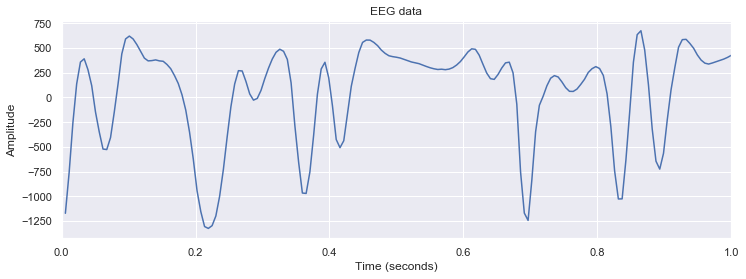

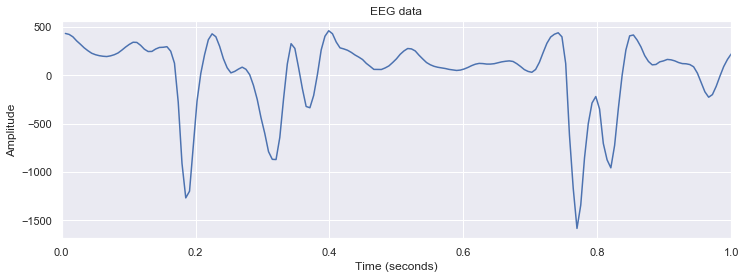

In [ ]:
for i in range(0,5):
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[0].iloc[i][1:-1]
    
    # Plot the signal
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    plt.plot(time, x)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 1])
    plt.title('EEG data')
    plt.show()

Plots for 5 datasets of the same patient on the same graph (To highlight diffenreces in phase)

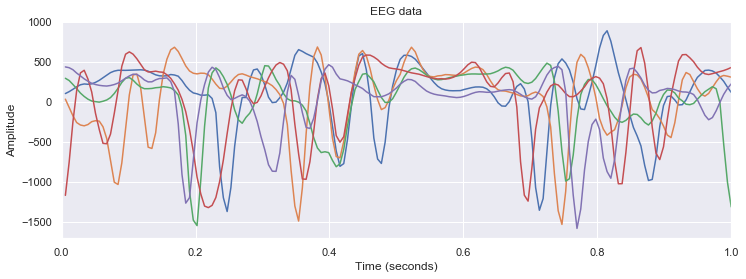

In [ ]:
# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([0, 1])
plt.title('EEG data')

for i in range(0,5):
    
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[0].iloc[i][1:-1]
    plt.plot(time, x)

Plots for datasets of the 5 different patient of class 1

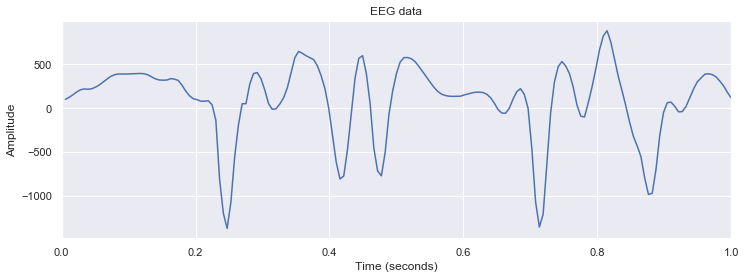

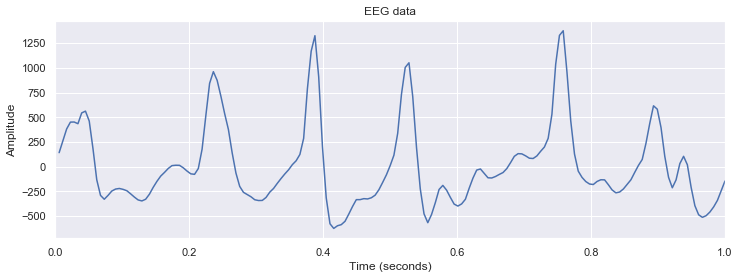

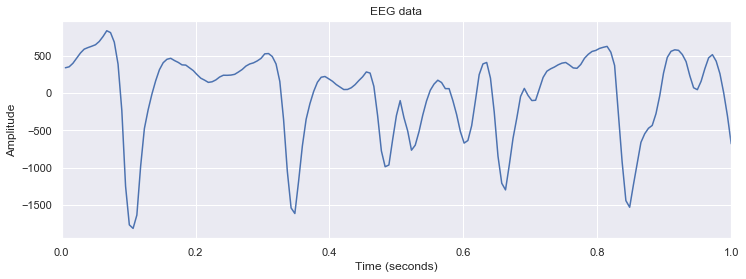

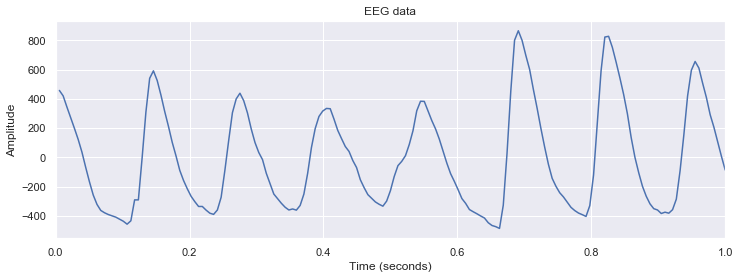

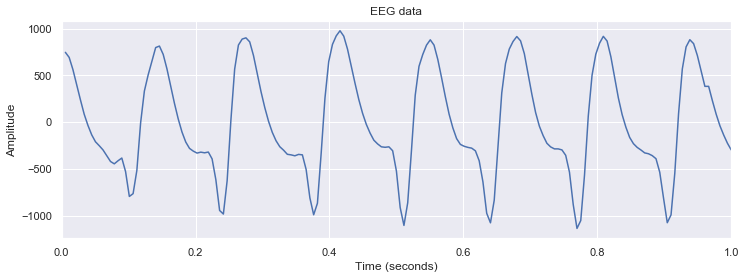

In [ ]:
for i in range(0,115,23):
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[0].iloc[i][1:-1]
    
    # Plot the signal
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    plt.plot(time, x)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 1])
    plt.title('EEG data')
    plt.show()

**From this plot, we can observe that while members of class 1 have distinctly different graphs, there appears to be a regular spike/dip in each of the graphs. These occur approximately every 0.18 to 0.2s. This might be a distinct characteristic for epilepsy seizure that we can explore later on.**

From the graphs above, we can discover that while the profile of the EEG data is consistent for each patient, they are highly different from one another when compared to other patients even if they fall into the same class. Besides that, even for the same patient, we can see a noticeable phase difference. As such, machine learning algorithm might fail to capture these information.
Thus, it might be wiser to process the data in the frequency domain where such differences are taken into account.

Plots for datasets of the 5 different patient in each of the classes

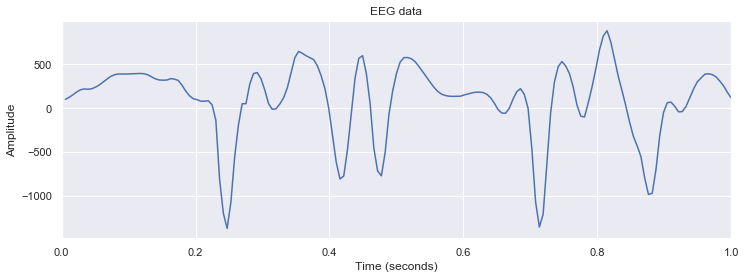

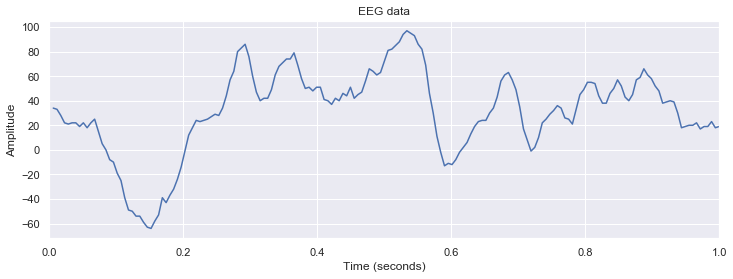

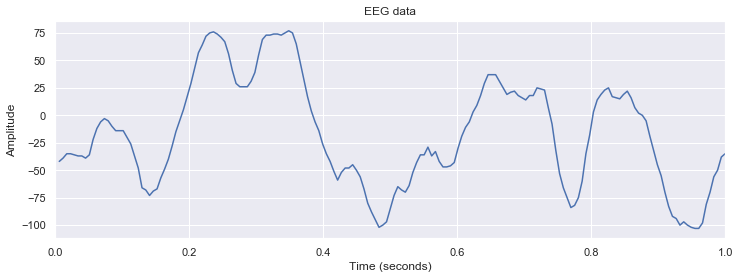

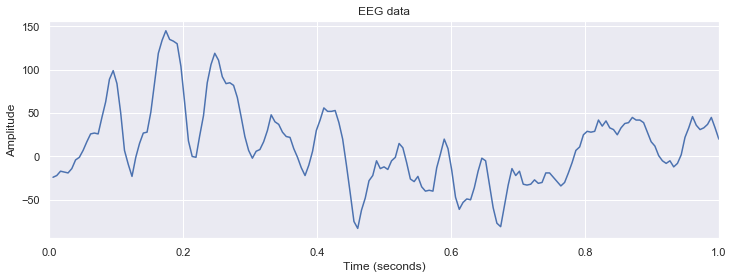

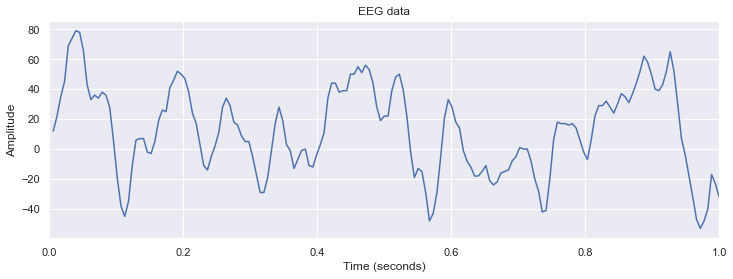

In [ ]:
for i in range(0,5):
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[i].iloc[0][1:-1]
    
    # Plot the signal
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    plt.plot(time, x)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 1])
    plt.title('EEG data')
    plt.show()

Simarly to analysis above, we can see distinctly different graphs when plotting each of the 5 classes. We can observe that class 1 seems to be distinctly different from the rest of the classes with extremely large amplitude changes and relatively smooth and regular graphs. The smoothness may be attributed to the extremely large amplitude changes which mask the small changes in amplitude when presented in a graph. Aside from that, it may be hard to differentitate the rest of the 4 classes at this point in time.

In [ ]:
mean={}
for i in range(0,5):
    std_1=ep[i].drop(['Time','y'], axis=1).std(axis=1)
    mean["class{}".format(i+1)]=(std_1.mean())
mean

{'class1': 303.472483948053,
 'class2': 60.629722370011656,
 'class3': 47.78537578917578,
 'class4': 59.192105143026765,
 'class5': 38.5321940129388}

In [ ]:
median={}
for i in range(0,5):
    std_1=ep[i].drop(['Time','y'], axis=1).std(axis=1)
    median["class{}".format(i+1)]=(std_1.median())
median

{'class1': 277.4137547180365,
 'class2': 45.86176792829684,
 'class3': 44.80547764151015,
 'class4': 54.47871039301483,
 'class5': 38.13346653970736}

In [ ]:
std={}
for i in range(0,5):
    std_1=ep[i].drop(['Time','y'], axis=1).std(axis=1)
    std["class{}".format(i+1)]=(std_1.std())
std

{'class1': 153.077731141822,
 'class2': 57.67903775844884,
 'class3': 22.12837371544869,
 'class4': 21.15817161829366,
 'class5': 10.099196566344036}

# Binary Classification using Time Series Data

Now that we have understood our data from data exploration, let's use ML algorithms for classification

Changing the values of the column "y" to either 1 or 0. Since we are performing Binary Classification to find whether a person is epilleptic or not, we need to find whether a row(EEG signal) belongs to class 1 or not.

Creating a new column "Result" which contains either 1 or 0(updated values of the column "y") and deleting the the column "y"


In [ ]:
df = pd.read_csv('data.csv')
df["Result"]=df.y==1
df["Result"]=df["Result"].astype(int)
df.pop("y")
df.drop(df.columns[0], axis=1, inplace=True)

# Splitting the datasets into Train and Test Datasets

In [ ]:
from sklearn.model_selection import train_test_split

Result = pd.DataFrame(df['Result']) 
X = df.drop(df.columns[178], axis=1, inplace=False)


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Result, test_size = 0.25)

In [ ]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


Data Preprocessing in order to be for data valid across different classification algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X)

# transform our data matrices
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Trying various classification algorithms

# 1.Gradient Boosting Classification

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=3, random_state=69)
gb_clf.fit(X_train, y_train)

print('Gradient Boosting Classifier')
print('Training:')

print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Classifier
Training:
Accuracy score (training): 0.949
Accuracy score (test): 0.914


# 2.Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9094492753623188

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8928695652173914

For Train Dataset
True Negatives= 6711
False Positives= 205
False Negatives= 576
True Positives= 1133

True Negative Rate = 0.9703585887796414
False Positive Rate = 0.02964141122035859
False Negative Rate = 0.33703920421299005
True Positive Rate = 0.66296079578701

For Test Dataset
True Negatives= 2197
False Positives= 87
False Negatives= 221
True Positives= 370

True Negative Rate = 0.9619089316987741
False Positive Rate = 0.03809106830122592
False Negative Rate = 0.3739424703891709
True Positive Rate = 0.626057529610829



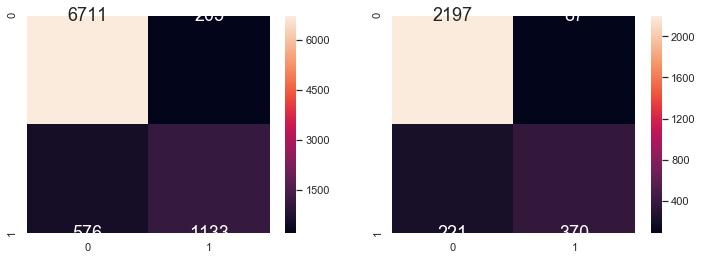

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("For Train Dataset")
print("True Negatives= {0}\nFalse Positives= {1}\nFalse Negatives= {2}\nTrue Positives= {3}".format(tn, fp, fn, tp))

tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
fpr=fp/(fp+tn)
fnr=fn/(fn+tp)
print()

print("True Negative Rate = {0}\nFalse Positive Rate = {1}\nFalse Negative Rate = {2}\nTrue Positive Rate = {3}".format(tnr, fpr, fnr, tpr))
print()
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("For Test Dataset")
print("True Negatives= {0}\nFalse Positives= {1}\nFalse Negatives= {2}\nTrue Positives= {3}".format(tn, fp, fn, tp))


tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
fpr=fp/(fp+tn)
fnr=fn/(fn+tp)
print()

print("True Negative Rate = {0}\nFalse Positive Rate = {1}\nFalse Negative Rate = {2}\nTrue Positive Rate = {3}".format(tnr, fpr, fnr, tpr))
print()


# 3.Random Forest Classification

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9828405797101449

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.959304347826087



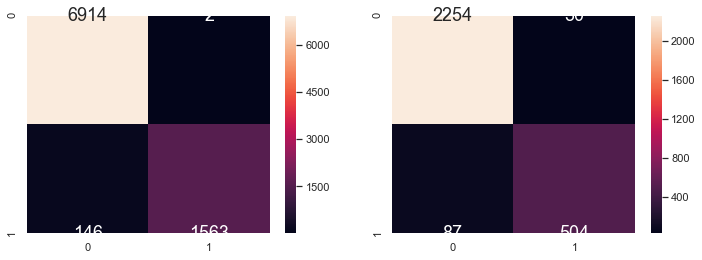

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 10, random_state = 69)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# 4.Extreme Random Forest Classification

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9973333333333333

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9690434782608696



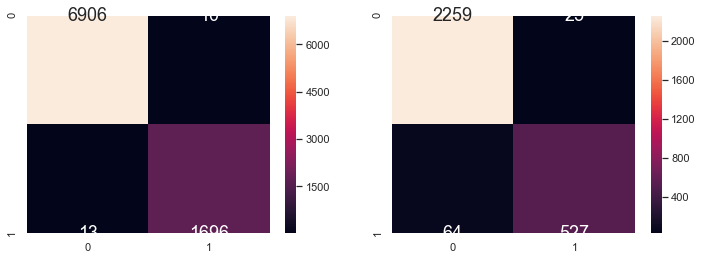

In [ ]:
etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)

etc.fit(X_train, y_train)

y_train_pred = etc.predict(X_train)
y_test_pred = etc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", etc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", etc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# Conclusion

Conclusion: We can use Time Series Data to classify an EEG signal as epileptic or not as we were getting very high accuracies of most of the above tried classification algorithms. This is due to the huge variations in the datapoints as seen in the exploratory analysis before.

All the algorithms yielded very high classification accuracies with Extreme Random Forest having the highest classification accuracy of around 97%